## Dataset Selection

In [2]:
import os
import pandas as pd

data_dir_path = r'..\data\elmundo_chunked_es_page1_40years'

documents = []

# Loop through all files in the directory
for filename in os.listdir(data_dir_path):
    if filename.endswith(".txt"):  # Only process .txt files
        file_path = os.path.join(data_dir_path, filename)
        
        # Open and read the text file
        with open(file_path, "r", encoding="utf-8") as file:
            text = file.read()
        
        # Store filename and text content
        documents.append({"filename": filename, "text": text})

# put in Pandas DataFrame
df = pd.DataFrame(documents)

## EDA

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dbigman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1668 entries, 0 to 1667
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  1668 non-null   object
 1   text      1668 non-null   object
dtypes: object(2)
memory usage: 26.2+ KB


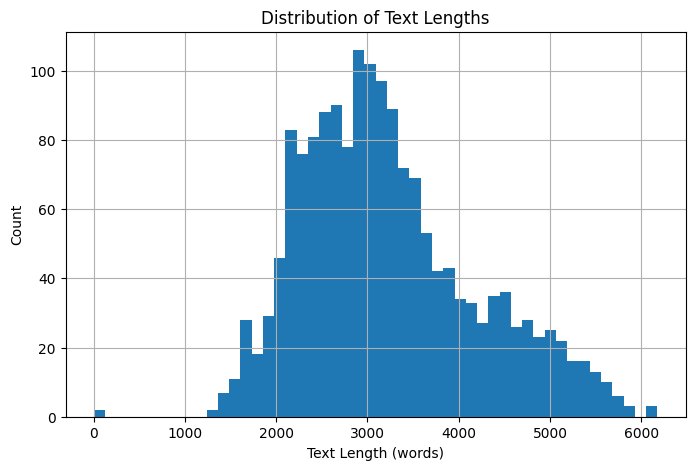

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from collections import Counter

nltk.download("punkt")

# Display basic information about the dataset
df_info = df.info()

# Add a column for text length (word count)
df["text_length"] = df["text"].apply(lambda x: len(str(x).split()))

# Summary statistics for text length
text_length_stats = df["text_length"].describe()

# Plot text length distribution
plt.figure(figsize=(8, 5))
df["text_length"].hist(bins=50)
plt.xlabel("Text Length (words)")
plt.ylabel("Count")
plt.title("Distribution of Text Lengths")
plt.show()

# Check for duplicate text entries
duplicate_count = df.duplicated(subset=["text"]).sum()
df = df.drop_duplicates(subset=["text"])

### Data cleaning, normalization and preprocessing

In [4]:
import pandas as pd
import unidecode
import spacy
# import contractions
import string
import logging
import time
import re

# Configure logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

# Start timer for execution tracking
start_time = time.time()
logging.info("Starting data preprocessing...")


# Ensure all text values are strings before applying unidecode
logging.info("Applying unidecode")
df['text'] = df['text'].astype(str).apply(unidecode.unidecode)

logging.info("Normalizing spaces")
df['text'] = df['text'].apply(lambda x: ' '.join(str(x).split()))  # Normalize spaces


# Loading NLP Model
# spacy_model = 'en_core_web_lg' # english
spacy_model = 'es_core_news_lg' # spanish
logging.info(f"Loading spacy model: {spacy_model}")
nlp = spacy.load(spacy_model)


# function to extract structured information (NER Engine)
def extract_structured_info(text):
    # Lowercase the text
    text = text.lower()
    
    # Remove punctuation but keep numbers
    text = re.sub(r'[^\w\s\d]', '', text)  # Keeps words, spaces, and numbers

    # Normalize spaces
    text = ' '.join(text.split())  

    # Process text with spaCy
    doc = nlp(text)

    # Dictionary to store structured data
    structured_data = {
        "Municipality": None,  # Now mapped to GPE
        "Landmark": None,      # Now mapped to FAC
        # "Restaurant": None,    # Not explicitly extracted (needs a custom rule)
        "Attraction": None,    # Mapped to LOC
        "Organization": None,  # ORG
        "Event": None,         # EVENT
        "Work_of_Art": None,   # WORK_OF_ART
        "Product": None        # PRODUCT
    }

    # Iterate over named entities
    for ent in doc.ents:
        if ent.label_ == "GPE":  # Geopolitical Entity (cities, states, countries)
            structured_data["Municipality"] = ent.text
        elif ent.label_ == "ORG":  # Organization
            structured_data["Organization"] = ent.text
        elif ent.label_ == "LOC":  # General Location
            structured_data["Attraction"] = ent.text
        elif ent.label_ == "FAC":  # Facilities (landmarks, buildings, bridges, airports)
            structured_data["Landmark"] = ent.text
        elif ent.label_ == "EVENT":  # Events (e.g., "World Cup", "Olympics")
            structured_data["Event"] = ent.text
        elif ent.label_ == "WORK_OF_ART":  # Books, songs, paintings, etc.
            structured_data["Work_of_Art"] = ent.text
        elif ent.label_ == "PRODUCT":  # Consumer products, devices, brands
            structured_data["Product"] = ent.text

    return structured_data
       

def preprocess_text(text):
    """Normalize text: expand contractions, lowercase, remove punctuation (except numbers), lemmatize"""
    # text = contractions.fix(text)  # Expand contractions
    text = text.lower()  # Lowercase
    # Remove punctuation but keep numbers
    text = text.translate(str.maketrans('', '', string.punctuation.replace('0123456789', '')))

    text = ' '.join(text.split())  # Normalize spaces
    
    doc = nlp(text)
       
    tokens = [token.lemma_ for token in doc]  # Lemmatization (without is_alpha)
    return ' '.join(tokens)


# Extract structured info
df["named_entities"] = df["text"].apply(extract_structured_info)


# Apply text preprocessing
df['normalized_text'] = df['text'].apply(preprocess_text)

# Log: Time taken
end_time = time.time()
logging.info(f"Total execution time: {end_time - start_time:.2f} seconds")


2025-02-13 19:07:22,540 - INFO - Starting data preprocessing...
2025-02-13 19:07:22,541 - INFO - Applying unidecode
2025-02-13 19:07:30,569 - INFO - Normalizing spaces
2025-02-13 19:07:30,842 - INFO - Loading spacy model: es_core_news_lg
2025-02-13 19:26:12,521 - INFO - Total execution time: 1129.98 seconds


### Visualization 

c:\Users\dbigman\OneDrive - SUDOC LLC\Desktop\GitHub\Ironhack_bootcamp\project-dsml-interactive-travel-planner\.venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


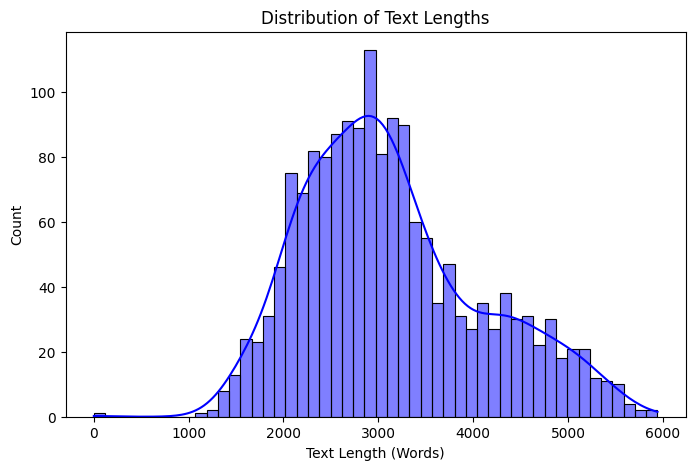

c:\Users\dbigman\OneDrive - SUDOC LLC\Desktop\GitHub\Ironhack_bootcamp\project-dsml-interactive-travel-planner\.venv\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\dbigman\OneDrive - SUDOC LLC\Desktop\GitHub\Ironhack_bootcamp\project-dsml-interactive-travel-planner\.venv\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


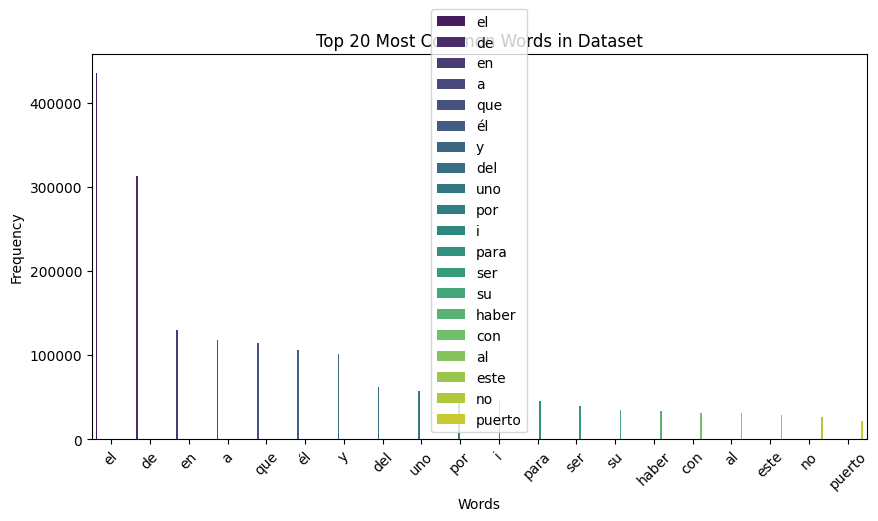

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Ensure 'text_length' column exists
df["text_length"] = df["normalized_text"].apply(lambda x: len(x.split()))

# Text Length Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["text_length"], bins=50, kde=True, color="blue")
plt.xlabel("Text Length (Words)")
plt.ylabel("Count")
plt.title("Distribution of Text Lengths")
plt.show()

# Most Common Words
all_words = " ".join(df["normalized_text"]).split()
word_freq = Counter(all_words)

# Get the 20 most common words
common_words = word_freq.most_common(20)
words, counts = zip(*common_words)

# Updated Bar Plot for Most Common Words
plt.figure(figsize=(10, 5))
sns.barplot(x=list(words), y=list(counts), hue=list(words), palette="viridis"
            # , legend=False
            )
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Most Common Words in Dataset")
plt.xticks(rotation=45)
plt.show()


### Chunking

In [ ]:
-- Active: 1736910132162@@192.168.1.79@3306
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.schema import Document

# Function to extract keywords using TF-IDF
def extract_keywords(text, top_n=5):
    vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
    tfidf_matrix = vectorizer.fit_transform([text])
    feature_names = vectorizer.get_feature_names_out()
    scores = tfidf_matrix.toarray().flatten()
    keyword_indices = scores.argsort()[-top_n:][::-1]  # Get top n keywords
    keywords = [feature_names[i] for i in keyword_indices]
    return ", ".join(keywords)

# Initialize text splitter with chunk size and overlap
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=500,     
    chunk_overlap=50
)

# Create a list of LangChain `Document` objects
chunks = []

for _, row in df.iterrows():
    # Split text into chunks using LangChain's splitter
    text_chunks = text_splitter.split_text(row["normalized_text"])
    keywords = extract_keywords(row["normalized_text"])  # Extract keywords from full text

    # Store each chunk as a `Document` object
    for chunk_id, chunk in enumerate(text_chunks):
        doc = Document(
            page_content=chunk, 
            metadata={
                "filename": row["filename"],
                "chunk_id": chunk_id,
                "keywords": keywords  # Store extracted keywords as metadata
            }
        )
        chunks.append(doc)

# Verify Output
logging.info(f"Total chunks created: {len(chunks)}")
logging.info("Example chunk content:\n" + chunks[0].page_content)
logging.info("Metadata example: " + str(chunks[0].metadata))


Total Chunks: 65888
Example Chunk:
elwndo 8 pagina 3 ctvs semestre 400 uno ano 750 oficina salvador brau 81 tel 833 p o box 345 diario de el marana excepto el domingo akou s2e z i san juan puerto rico 71 i 1 r sabado 3 de enero de 1920 r i numero 271 entered as second class matter february 21 1919 at the post office at san jean porto rico under the act of march 3 1879 complot para asesinar al principe de serbio 192000 tonelada en diqu entregar el alemán firmado ya el paz w sito americano hadarai en francia excursion banquete y

Metadata: {'filename': '19200103_1.txt', 'chunk_id': 0, 'keywords': 'el, en, él, que, del'}


In [8]:
import json

# Convert each Document to a dictionary
def document_to_dict(doc):
    return {
        "page_content": doc.page_content,
        "metadata": doc.metadata
    }

chunks_dict = [document_to_dict(doc) for doc in chunks]

# Save the list of dictionaries as JSON
with open('chunks.json', 'w', encoding='utf-8') as f:
    json.dump(chunks_dict, f, ensure_ascii=False, indent=2)

# To load it back:
with open('chunks.json', 'r', encoding='utf-8') as f:
    loaded_chunks_dict = json.load(f)


### Embedding

In [12]:
import ray

ray.init(runtime_env={"pip": ["langchain", "pypdf", "sentence_transformers", "transformers"]})


2025-02-13 23:55:17,580	INFO worker.py:1841 -- Started a local Ray instance.
2025-02-13 23:55:17,584	WARNING validation.py:240 -- runtime environment support is experimental on Windows. If you run into issues please file a report at https://github.com/ray-project/ray/issues.
2025-02-13 23:55:17,585	WARNING validation.py:240 -- runtime environment support is experimental on Windows. If you run into issues please file a report at https://github.com/ray-project/ray/issues.
2025-02-13 23:55:17,585	WARNING validation.py:240 -- runtime environment support is experimental on Windows. If you run into issues please file a report at https://github.com/ray-project/ray/issues.


RayContext(dashboard_url='', python_version='3.10.10', ray_version='2.42.1', ray_commit='c2e38f7b75be223c0c033986472daada8622d64f')

In [3]:
import os
import pickle
import time
import ray
import logging
from dotenv import load_dotenv
from icecream import ic  # For debugging/logging (optional)
import json

# Import Document from langchain.schema
try:
    from langchain.schema import Document
except ImportError:
    raise ImportError("Could not import Document from langchain.schema. Make sure langchain is installed.")

# Logging
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s [%(levelname)s] %(message)s",
    datefmt="%Y-%m-%d %H:%M:%S"
)
logger = logging.getLogger(__name__)

# Environment Setup
load_dotenv()  
openai_api_key = os.getenv("OPENAI_API_KEY")
if not openai_api_key:
    logger.error("OPENAI_API_KEY not found in environment variables.")
    exit(1)


# Load the JSON file containing the document chunks
with open('chunks.json', 'r', encoding='utf-8') as f:
    loaded_chunks_dict = json.load(f)

chunks = [
    Document(page_content=doc["page_content"], metadata=doc["metadata"])
    for doc in loaded_chunks_dict
]
logger.info("Loaded %d document chunks from chunks.json.", len(chunks))


# Initialize Ray
if not ray.is_initialized():
    ray.init()  # Start Ray instance using all available cores.
else:
    ray.init(ignore_reinit_error=True)
logger.info("Ray initialized successfully.")



# Define a Ray Actor for Embedding Computation with Retry Logic
@ray.remote
class EmbeddingWorker:
    """
    Ray Actor that encapsulates an OpenAIEmbeddings model for computing embeddings.
    Includes built-in retry logic to handle intermittent failures.
    """
    def __init__(self, openai_api_key, max_retries=3, retry_delay=2):
        from langchain_openai import OpenAIEmbeddings
        self.embedding_model = OpenAIEmbeddings(
            model="text-embedding-3-small",
            openai_api_key=openai_api_key
        )
        self.max_retries = max_retries
        self.retry_delay = retry_delay
        logger.info("EmbeddingWorker initialized with max_retries=%s and retry_delay=%s seconds.", 
                    max_retries, retry_delay)

    def embed(self, text: str):
        """
        Computes the embedding for the given text with retry logic.

        Parameters:
            text (str): The text to embed.

        Returns:
            list: The computed embedding as a list of floats.
        """
        attempts = 0
        while attempts < self.max_retries:
            try:
                embedding = self.embedding_model.embed_query(text)
                return embedding
            except Exception as e:
                attempts += 1
                logger.warning("Embedding failed on attempt %s/%s: %s", attempts, self.max_retries, e)
                time.sleep(self.retry_delay)
        # If all retries fail, raise the exception
        raise Exception(f"Failed to embed text after {self.max_retries} attempts.")

# -----------------------------------------------------------------------------
# Checkpointing for Continuation Support
# -----------------------------------------------------------------------------
CHECKPOINT_FILE = 'chunk_embeddings_checkpoint.pkl'

def load_checkpoint():
    """Load existing embeddings from the checkpoint file if available."""
    if os.path.exists(CHECKPOINT_FILE):
        with open(CHECKPOINT_FILE, 'rb') as f:
            checkpoint = pickle.load(f)
            logger.info("Loaded checkpoint with %d embeddings.", len(checkpoint))
            return checkpoint
    return {}

def save_checkpoint(checkpoint):
    """Save the current checkpoint dictionary to file."""
    with open(CHECKPOINT_FILE, 'wb') as f:
        pickle.dump(checkpoint, f)
    logger.info("Checkpoint saved with %d embeddings.", len(checkpoint))

# Load existing checkpoint if any.
checkpoint = load_checkpoint()

# -----------------------------------------------------------------------------
# Create a Pool of Embedding Workers
# -----------------------------------------------------------------------------
num_workers = 4  # Adjust based on available CPU cores or workload.
workers = [EmbeddingWorker.remote(openai_api_key) for _ in range(num_workers)]
logger.info("Created %d embedding workers.", num_workers)

def get_worker(index: int):
    """Round-robin assignment of tasks to workers."""
    return workers[index % num_workers]

# -----------------------------------------------------------------------------
# Process Document Chunks in Parallel with Continuation Support
# -----------------------------------------------------------------------------
# Assume `chunks` is a list of document objects with a `page_content` attribute.
if 'chunks' not in globals():
    logger.error("The variable 'chunks' is not defined. Please define your document chunks.")
    exit(1)

# Create a list to store tasks that are not already completed.
embedding_tasks = []
# We'll keep a mapping of task indices to the chunk index.
task_mapping = {}

for idx, doc in enumerate(chunks):
    if idx in checkpoint:
        logger.info("Skipping document %d as it is already processed.", idx)
        continue
    worker = get_worker(idx)
    task = worker.embed.remote(doc.page_content)
    embedding_tasks.append(task)
    task_mapping[len(embedding_tasks) - 1] = idx  # Map local task index to document index.
    logger.info("Dispatched embedding task for document %d.", idx)

if not embedding_tasks:
    logger.info("All documents have already been processed. No tasks to dispatch.")
else:
    # Process tasks as they complete and update checkpoint.
    results = ray.get(embedding_tasks)
    for local_idx, embedding in enumerate(results):
        doc_idx = task_mapping[local_idx]
        checkpoint[doc_idx] = embedding
        logger.info("Document %d processed successfully.", doc_idx)
        # Save checkpoint after each completed task.
        save_checkpoint(checkpoint)

# -----------------------------------------------------------------------------
# Combine Results in Order and Save the Final Embeddings
# -----------------------------------------------------------------------------
# Create a list of embeddings corresponding to the order of `chunks`
chunk_embeddings = [checkpoint[idx] for idx in range(len(chunks)) if idx in checkpoint]

FINAL_OUTPUT = 'chunk_embeddings.pkl'
with open(FINAL_OUTPUT, 'wb') as f:
    pickle.dump(chunk_embeddings, f)
logger.info("Final embeddings saved successfully to '%s'.", FINAL_OUTPUT)

# -----------------------------------------------------------------------------
# Verification and Debug Output
# -----------------------------------------------------------------------------
print(f"Generated {len(chunk_embeddings)} embeddings")
if chunk_embeddings:
    print(f"Example Embedding (First Chunk): {chunk_embeddings[0][:5]}...")  # Display first 5 values


2025-02-14 00:25:03 [INFO] Loaded 65888 document chunks from chunks.json.
2025-02-14 00:25:07,841	INFO worker.py:1841 -- Started a local Ray instance.
2025-02-14 00:25:09 [INFO] Ray initialized successfully.
2025-02-14 00:25:09 [INFO] Created 4 embedding workers.
2025-02-14 00:25:09 [INFO] Dispatched embedding task for document 0.
2025-02-14 00:25:09 [INFO] Dispatched embedding task for document 1.
2025-02-14 00:25:09 [INFO] Dispatched embedding task for document 2.
2025-02-14 00:25:09 [INFO] Dispatched embedding task for document 3.
2025-02-14 00:25:09 [INFO] Dispatched embedding task for document 4.
2025-02-14 00:25:09 [INFO] Dispatched embedding task for document 5.
2025-02-14 00:25:09 [INFO] Dispatched embedding task for document 6.
2025-02-14 00:25:09 [INFO] Dispatched embedding task for document 7.
2025-02-14 00:25:09 [INFO] Dispatched embedding task for document 8.
2025-02-14 00:25:09 [INFO] Dispatched embedding task for document 9.
2025-02-14 00:25:09 [INFO] Dispatched embeddin

(raylet) Warning: More than 5000 tasks are pending submission to actor 71b5fa29194a343378da1d6b01000000. To reduce memory usage, wait for these tasks to finish before sending more.


2025-02-14 00:25:25 [INFO] Dispatched embedding task for document 20381.
2025-02-14 00:25:25 [INFO] Dispatched embedding task for document 20382.
2025-02-14 00:25:25 [INFO] Dispatched embedding task for document 20383.
2025-02-14 00:25:25 [INFO] Dispatched embedding task for document 20384.
2025-02-14 00:25:25 [INFO] Dispatched embedding task for document 20385.
2025-02-14 00:25:25 [INFO] Dispatched embedding task for document 20386.
2025-02-14 00:25:25 [INFO] Dispatched embedding task for document 20387.
2025-02-14 00:25:25 [INFO] Dispatched embedding task for document 20388.
2025-02-14 00:25:25 [INFO] Dispatched embedding task for document 20389.
2025-02-14 00:25:25 [INFO] Dispatched embedding task for document 20390.
2025-02-14 00:25:25 [INFO] Dispatched embedding task for document 20391.
2025-02-14 00:25:25 [INFO] Dispatched embedding task for document 20392.
2025-02-14 00:25:25 [INFO] Dispatched embedding task for document 20393.
2025-02-14 00:25:25 [INFO] Dispatched embedding tas

(raylet) Warning: More than 10000 tasks are pending submission to actor 17ad82779f0c0b4095e8688301000000. To reduce memory usage, wait for these tasks to finish before sending more.


2025-02-14 00:25:40 [INFO] Dispatched embedding task for document 40539.
2025-02-14 00:25:40 [INFO] Dispatched embedding task for document 40540.
2025-02-14 00:25:40 [INFO] Dispatched embedding task for document 40541.
2025-02-14 00:25:40 [INFO] Dispatched embedding task for document 40542.
2025-02-14 00:25:40 [INFO] Dispatched embedding task for document 40543.
2025-02-14 00:25:40 [INFO] Dispatched embedding task for document 40544.
2025-02-14 00:25:40 [INFO] Dispatched embedding task for document 40545.
2025-02-14 00:25:40 [INFO] Dispatched embedding task for document 40546.
2025-02-14 00:25:40 [INFO] Dispatched embedding task for document 40547.
2025-02-14 00:25:40 [INFO] Dispatched embedding task for document 40548.
2025-02-14 00:25:40 [INFO] Dispatched embedding task for document 40549.
2025-02-14 00:25:40 [INFO] Dispatched embedding task for document 40550.
2025-02-14 00:25:40 [INFO] Dispatched embedding task for document 40551.
2025-02-14 00:25:40 [INFO] Dispatched embedding tas

OSError: [Errno 22] Invalid argument: 'chunk_embeddings_checkpoint.pkl'

In [ ]:
from langchain.vectorstores import Chroma

# Initialize ChromaDB
persist_directory = "chroma_db"
vector_store = Chroma(persist_directory=persist_directory, embedding_function=embedding_model)

# Store documents with embeddings in Chroma
vector_store.add_documents(chunks)
vector_store.persist()

print("✅ Embeddings stored in ChromaDB!")


In [ ]:
# Validating that the embeddings capture semantic meaning by checking a few sample outputs.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import ast





print("Embedding Shape:", df["embedding"].iloc[0].shape)  # Should be (3072,) for 'text-embedding-3-large'

# Compute Similarities Between Sample Texts
sample_texts = df.sample(5)  # Select 5 random samples
embeddings = np.vstack(sample_texts["embedding"].values)  # Convert list of arrays to matrix

# Compute Cosine Similarity
cos_sim_matrix = cosine_similarity(embeddings)

# Print Pairwise Similarities
print("\n Pairwise Cosine Similarities Between Sample Texts:")
print(cos_sim_matrix)

# Visualize Embeddings with PCA 
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Scatter Plot of PCA-Reduced Embeddings
plt.figure(figsize=(6, 4))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], color="blue")

# Annotate with Sample File Names
for i, filename in enumerate(sample_texts["filename"]):
    plt.annotate(filename, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Visualization of Embeddings")
plt.show()


In [ ]:
#  Testing embeddings 

from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Prepare Embeddings for Similarity Calculation
embeddings_matrix = np.vstack(df["embedding"].values)

# Compute Cosine Similarity Matrix
cos_sim_matrix = cosine_similarity(embeddings_matrix)

# Define a Function for Retrieval with a Similarity Threshold
def retrieve_similar_documents(query_embedding, df, threshold=0.75, top_n=5):
    """
    Retrieves documents from df based on cosine similarity to the query embedding.
    
    Args:
        query_embedding (np.array): The embedding of the query text.
        df (pd.DataFrame): The dataset containing document embeddings.
        threshold (float): Minimum cosine similarity required for retrieval.
        top_n (int): Maximum number of documents to return.

    Returns:
        pd.DataFrame: Filtered documents that meet the similarity threshold.
    """
    # Compute similarity between query and all document embeddings
    similarities = cosine_similarity([query_embedding], np.vstack(df["embedding"].values)).flatten()

    # Store results in a DataFrame
    df["similarity_score"] = similarities

    # Filter documents based on the threshold
    relevant_docs = df[df["similarity_score"] >= threshold]

    # Sort by highest similarity and return top_n results
    return relevant_docs.sort_values(by="similarity_score", ascending=False).head(top_n)

# Query Retrieval
query_text = "Puerto Rico economy coffee, tobacco, statehood, independence"
query_embedding = generate_openai_embedding(query_text)  # Generate embedding for the query

# Retrieve most relevant documents with different thresholds
strict_results = retrieve_similar_documents(query_embedding, df, threshold=0.40, top_n=5)
broad_results = retrieve_similar_documents(query_embedding, df, threshold=0.35, top_n=5)


print("\nStrict Retrieval (Threshold = 0.40)")
print(strict_results[["filename", "similarity_score"]])

print("\nBroad Retrieval (Threshold = 0.35)")
print(broad_results[["filename", "similarity_score"]])


In [ ]:
def retrieve_similar_documents(query_embedding, df, threshold=0.75, top_n=5):
    # Compute similarity between query and document embeddings
    similarities = cosine_similarity([query_embedding], np.vstack(df["embedding"].values)).flatten()
    
    # Store similarity scores in DataFrame
    df["similarity_score"] = similarities

    # Print similarity scores to debug
    print("\nAll Similarity Scores:")
    print(df[["filename", "similarity_score"]].sort_values(by="similarity_score", ascending=False).head(10))

    # Filter based on threshold
    relevant_docs = df[df["similarity_score"] >= threshold]
    
    # Sort and return top results
    return relevant_docs.sort_values(by="similarity_score", ascending=False).head(top_n)


query_text = "Japan war bomb"
query_embedding = generate_openai_embedding(query_text)  # Generate embedding for the query


strict_results = retrieve_similar_documents(query_embedding, df, threshold=0.40, top_n=5)
broad_results = retrieve_similar_documents(query_embedding, df, threshold=0.35, top_n=5)

# Print a document with the highest similarity
highest_sim_doc = df.iloc[787]["filename"]
print(f"\n Document with highest similarity: {highest_sim_doc}")

print("\nQuery: ", query_text)
